In [1]:

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.neural_network import MLPClassifier
import pickle
import cv2


# Just to make sure all the out puts get printed in individual jupyter cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
train_data = pd.read_pickle("train.pickle")
#train_data.keys()
train_coords = train_data['coords']
train_labels = train_data['labels']
train_features = train_data['features']
train_sizes = train_data['sizes']


valid_data = pd.read_pickle("valid.pickle")
valid_coords = valid_data['coords']
valid_labels = valid_data['labels']
valid_features = valid_data['features']
valid_sizes = valid_data['sizes']

test_data = pd.read_pickle("test.pickle")
test_coords = test_data['coords']
test_labels = test_data['labels']
test_features = test_data['features']
test_sizes = test_data['sizes']


signs = pd.read_csv("label_names.csv", index_col=0)

signs
train_features.shape
valid_features.shape
test_features.shape


,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


(34799, 32, 32, 3)

(4410, 32, 32, 3)

(12630, 32, 32, 3)

(array([ 180., 1980., 2010., 1260., 1770., 1650.,  360., 1290., 1260.,
        1320., 1800., 1170., 1890., 1920.,  690.,  540.,  360.,  990.,
        1080.,  180.,  300.,  270.,  330.,  450.,  240., 1350.,  540.,
         210.,  480.,  240.,  390.,  690.,  210.,  599.,  360., 1080.,
         330.,  180., 1860.,  270.,  300.,  210.,  210.]),
 array([ 0.        ,  0.97674419,  1.95348837,  2.93023256,  3.90697674,
         4.88372093,  5.86046512,  6.8372093 ,  7.81395349,  8.79069767,
         9.76744186, 10.74418605, 11.72093023, 12.69767442, 13.6744186 ,
        14.65116279, 15.62790698, 16.60465116, 17.58139535, 18.55813953,
        19.53488372, 20.51162791, 21.48837209, 22.46511628, 23.44186047,
        24.41860465, 25.39534884, 26.37209302, 27.34883721, 28.3255814 ,
        29.30232558, 30.27906977, 31.25581395, 32.23255814, 33.20930233,
        34.18604651, 35.1627907 , 36.13953488, 37.11627907, 38.09302326,
        39.06976744, 40.04651163, 41.02325581, 42.        ]),
 <BarContai

Text(0.5, 0, 'train')

Text(0, 0.5, 'signs')

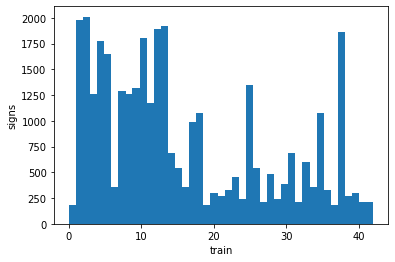

(array([ 30., 240., 240., 150., 210., 210.,  60., 150., 150., 150., 210.,
        150., 210., 240.,  90.,  90.,  60., 120., 120.,  30.,  60.,  60.,
         60.,  60.,  30., 150.,  60.,  30.,  60.,  30.,  60.,  90.,  30.,
         90.,  60., 120.,  60.,  30., 210.,  30.,  60.,  30.,  30.]),
 array([ 0.        ,  0.97674419,  1.95348837,  2.93023256,  3.90697674,
         4.88372093,  5.86046512,  6.8372093 ,  7.81395349,  8.79069767,
         9.76744186, 10.74418605, 11.72093023, 12.69767442, 13.6744186 ,
        14.65116279, 15.62790698, 16.60465116, 17.58139535, 18.55813953,
        19.53488372, 20.51162791, 21.48837209, 22.46511628, 23.44186047,
        24.41860465, 25.39534884, 26.37209302, 27.34883721, 28.3255814 ,
        29.30232558, 30.27906977, 31.25581395, 32.23255814, 33.20930233,
        34.18604651, 35.1627907 , 36.13953488, 37.11627907, 38.09302326,
        39.06976744, 40.04651163, 41.02325581, 42.        ]),
 <BarContainer object of 43 artists>)

Text(0.5, 0, 'valid')

Text(0, 0.5, 'signs')

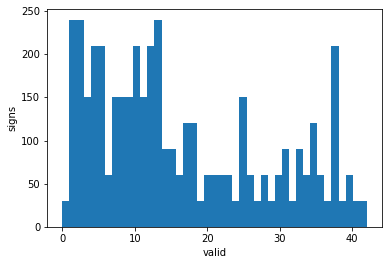

(array([ 60., 720., 750., 450., 660., 630., 150., 450., 450., 480., 660.,
        420., 690., 720., 270., 210., 150., 360., 390.,  60.,  90.,  90.,
        120., 150.,  90., 480., 180.,  60., 150.,  90., 150., 270.,  60.,
        210., 120., 390., 120.,  60., 690.,  90.,  90.,  60.,  90.]),
 array([ 0.        ,  0.97674419,  1.95348837,  2.93023256,  3.90697674,
         4.88372093,  5.86046512,  6.8372093 ,  7.81395349,  8.79069767,
         9.76744186, 10.74418605, 11.72093023, 12.69767442, 13.6744186 ,
        14.65116279, 15.62790698, 16.60465116, 17.58139535, 18.55813953,
        19.53488372, 20.51162791, 21.48837209, 22.46511628, 23.44186047,
        24.41860465, 25.39534884, 26.37209302, 27.34883721, 28.3255814 ,
        29.30232558, 30.27906977, 31.25581395, 32.23255814, 33.20930233,
        34.18604651, 35.1627907 , 36.13953488, 37.11627907, 38.09302326,
        39.06976744, 40.04651163, 41.02325581, 42.        ]),
 <BarContainer object of 43 artists>)

Text(0.5, 0, 'test')

Text(0, 0.5, 'signs')

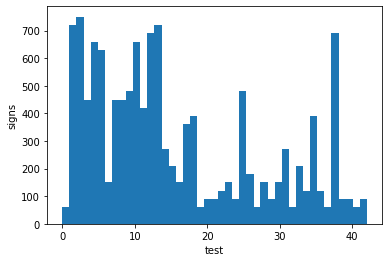

In [5]:
plt.hist(train_data['labels'], bins=43, width=1)
plt.xlabel('train')
plt.ylabel('signs')
plt.show()

plt.hist(valid_data['labels'], bins=43, width=1)
plt.xlabel('valid')
plt.ylabel('signs')
plt.show()


plt.hist(test_data['labels'], bins=43, width=1)
plt.xlabel('test')
plt.ylabel('signs')
plt.show()


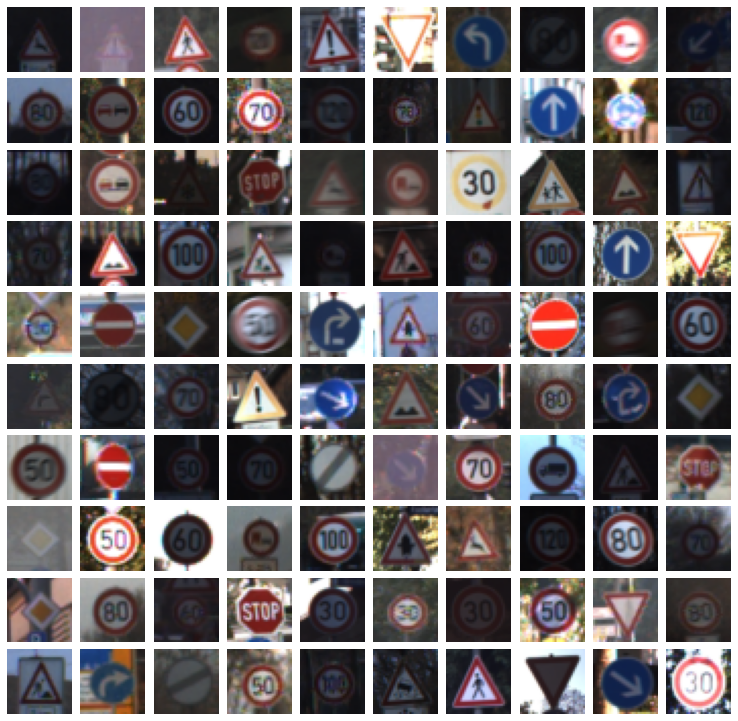

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.figure(figsize = (13,13))
grid = gridspec.GridSpec(10,10)
grid.update(wspace=0.1, hspace=0.1)  

for i in range(100):
    img_plt = plt.subplot(grid[i])
    rand = random.randint(0, len(features))
    plt.imshow(features[rand])
    plt.axis('off')

plt.show()

In [6]:
y_train = []
for i in range(len(train_labels)) :
    tmp = [ 0 for i in range(43) ]
    tmp[train_labels[i]] = 1
    y_train.append(tmp)
y_train = np.array(y_train)
x_train = train_features


y_test = []
for i in range(len(test_labels)) :
    tmp = [ 0 for i in range(43) ]
    tmp[test_labels[i]] = 1
    y_test.append(tmp)
y_test = np.array(y_test)
x_test = test_features



y_valid = []
for i in range(len(valid_labels)) :
    tmp = [ 0 for i in range(43) ]
    tmp[valid_labels[i]] = 1
    y_valid.append(tmp)
y_valid = np.array(y_valid)
x_valid = valid_features


print(y_train.shape, y_valid.shape, y_test.shape)

(34799, 43) (4410, 43) (12630, 43)


In [40]:

from skimage import exposure

def RgbtoGrey(img):
    img_grey = np.sum(img/3, axis=3, keepdims=True)
    return img_grey

x_train_grey = RgbtoGrey(x_train)
x_valid_grey = RgbtoGrey(x_valid)
x_test_grey = RgbtoGrey(x_test)




x_train_hist = x_train_grey
x_valid_hist = x_valid_grey

x_train_hist = x_train_hist.reshape(34799, 32, 32)
x_valid_hist = x_valid_hist.reshape(4410, 32, 32)


for i in range(len(x_train_hist)) : 
    x_train_hist[i] = exposure.equalize_hist(x_train_hist[i])
x_train_hist = np.array(x_train_hist)

for i in range(len(x_valid_hist)) :
    x_valid_hist[i] = exposure.equalize_hist(x_valid_hist[i])
x_valid_hist = np.array(x_valid_hist)

x_train_hist = x_train_hist.reshape(34799, 32, 32, 1)
x_valid_hist = x_valid_hist.reshape(4410, 32, 32, 1)
print(x_train_hist.shape, x_valid_hist.shape)




(34799, 32, 32, 1) (4410, 32, 32, 1)


In [43]:
x_train_final = x_train_grey
x_valid_final = x_valid_grey

y_train_final = y_train
y_valid_final = y_valid

In [41]:
x_train_final.shape

(34799, 32, 32, 1)

((34799, 32, 32, 1), (4410, 32, 32, 1))

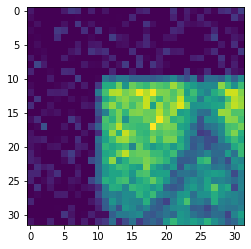

In [46]:


x_train_noise = x_train_hist
x_valid_noise = x_valid_hist
y_train_noise = y_train
y_valid_noise = y_valid

for i in range(len(x_train_noise)) :
    pic = x_train_noise[i]
    noiseImage = np.clip(pic + np.random.normal(0, 0.1, pic.shape), 0, 255) 
    x_train_noise[i] = noiseImage

for i in range(len(x_valid_noise)) :
    pic = x_valid_noise[i]
    noiseImage = np.clip(pic + np.random.normal(0, 0.1, pic.shape), 0, 255)  
    x_valid_noise[i] = noiseImage


x_train_noise.shape, x_valid_noise.shape
plt.imshow(x_valid_noise[432])




In [47]:



x_train_final = np.concatenate((x_train_final, x_train_noise), axis=0)
x_valid_final = np.concatenate((x_valid_final, x_valid_noise), axis=0)
y_train_final = np.concatenate((y_train, y_train), axis=0)
y_valid_final = np.concatenate((y_valid, y_valid), axis=0)

((34799, 32, 32, 1), (4410, 32, 32, 1))

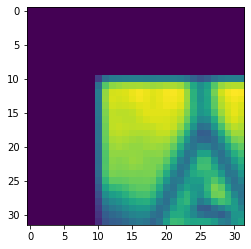

In [44]:
import numpy as np
from scipy.ndimage import zoom
from PIL import Image



x_train_rotate = x_train_hist
x_valid_rotate = x_valid_hist


for i in range(len(x_train_rotate)) :
    
    image = x_train_hist[i]
    height, width = image.shape[:2] 
    quarter_height, quarter_width = height / 6, width / 6
    T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) 
    img_translation = cv2.warpAffine(image, T, (width, height)) 
    x_train_rotate[i] = img_translation.reshape(32, 32, 1)

for i in range(len(x_valid_noise)) :
    
    image = x_train_hist[i]
    height, width = image.shape[:2] 
    quarter_height, quarter_width = height / 6, width / 6
    T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) 
    img_translation = cv2.warpAffine(image, T, (width, height)) 
    x_valid_rotate[i] = img_translation.reshape(32, 32, 1)

x_train_rotate.shape, x_valid_rotate.shape
plt.imshow(x_valid_rotate[432])



x_train_final = np.concatenate((x_train_final, x_train_rotate), axis=0)
x_valid_final = np.concatenate((x_valid_final, x_valid_rotate), axis=0)
y_train_final = np.concatenate((y_train, y_train), axis=0)
y_valid_final = np.concatenate((y_valid, y_valid), axis=0)

In [48]:
x_valid_final.shape
x_train_final.shape
y_train_final.shape
y_valid_final.shape

(13230, 32, 32, 1)

(104397, 32, 32, 1)

(69598, 43)

(8820, 43)

In [55]:
y_train_final = np.concatenate((y_train_final, y_train), axis=0)
y_valid_final = np.concatenate((y_valid_final, y_valid), axis=0)

In [56]:
x_valid_final.shape
x_train_final.shape
y_train_final.shape
y_valid_final.shape

(13230, 32, 32, 1)

(104397, 32, 32, 1)

(104397, 43)

(13230, 43)

In [54]:
y_valid.shape

(4410, 43)

Epoch 1/5
6525/6525 [==============================] - 79s 12ms/step - loss: 0.8431 - accuracy: 0.7466 - val_loss: 3.9871 - val_accuracy: 0.3190
Epoch 2/5
6525/6525 [==============================] - 81s 12ms/step - loss: 0.3236 - accuracy: 0.8966 - val_loss: 4.6557 - val_accuracy: 0.3359
Epoch 3/5
6525/6525 [==============================] - 86s 13ms/step - loss: 0.2499 - accuracy: 0.9192 - val_loss: 4.5355 - val_accuracy: 0.3436
Epoch 4/5
6525/6525 [==============================] - 82s 13ms/step - loss: 0.2166 - accuracy: 0.9297 - val_loss: 5.1765 - val_accuracy: 0.3435
Epoch 5/5
6525/6525 [==============================] - 81s 12ms/step - loss: 0.1959 - accuracy: 0.9372 - val_loss: 5.4861 - val_accuracy: 0.3480


Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 16)        160       
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)             

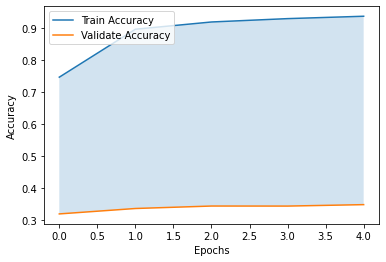

In [59]:

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

network = Sequential()
network.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)))
network.add(layers.Dropout(0.25))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Conv2D(32, (3, 3), activation='relu'))
network.add(layers.Dropout(0.25))
network.add(layers.MaxPooling2D((2, 2)))



network.add(layers.Flatten())
network.add(layers.Dense(600, activation='relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(43, activation='softmax'))

network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = network.fit(x_train_final, y_train_final, validation_data=(x_valid_final, y_valid_final), epochs=5, batch_size=16)



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.fill_between([i for i in range(5)], history.history['accuracy'], history.history['val_accuracy'], alpha=0.2, interpolate=True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validate Accuracy'], loc='upper left')


network.summary()

In [40]:
WeightFile = network.get_weights()

import pickle
try:
    fpkl= open('weights', 'wb')    #Python 3     
    pickle.dump(WeightFile, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
    fpkl.close()
except:
    fpkl= open('weights', 'w')    #Python 2      
    pickle.dump(WeightFile, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
    fpkl.close()